<h2 align='center'> Analysis methods for Time series data</h2>

<p> Import required libraries </p>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.fft as ft

<h3 align = 'center'> Fast Fourier Transfom (FFT) </h3>

<p> Fourier transform transforms data from time domain to frequency domain and vice versa.</p>

<img align="center" src="../images/FFT-Time-Frequency-View.png" width = "400px">

Fourier Transform: \$$f(\omega) = \int^{\infty}_{-\infty} f(t) e^{2\pi i x \omega} dt$$

DFT: \$$F(\omega) = \sum_{n-0}^{N-1}x(n)e^{-i \omega n}$$

<h4>(FFT) </h4>

<ol>
    <li> It coumputes Discrete Fourier transform (DFT) of finite sequence of a equally spaced dataset.</li>
    <li> This transformed data can be used to look for signals in random data </li>
</ol>


<h3>Generating lightcurve </h3>

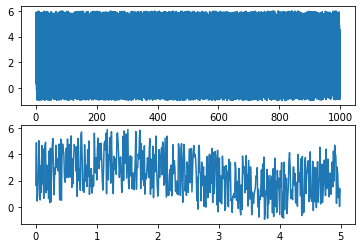

In [378]:
x_start = 0 # initial or starting point
x_stop = 1000 # end point
x_step = 0.01 # step size

x = np.arange(x_start,x_stop,x_step) # generating evenly spaces time axis
y = np.sin(2*np.pi*0.2*x)+5*np.random.random(x.size) # generating signal data points with random noise.

# Plotting time (x) vs data (y) to get the lightcurve

plt.subplot(212)
plt.plot(x[:500],y[:500])
plt.subplot(211)
plt.plot(x,y)

<h3 align = 'center'>Power Spectral Density </h3>

<p> The Power Spectral Density is a tool for analysing the random signal. Periodic or quasi-periodic signals hiddden in random data is visible in power spectrum graph. </p>

<h4> Steps to get PSD </h4>

<ol>
    <li> 
        Generating frequency axis from the time axis by providing window lenght and sample spacing to fftfreq.
    </li>
    <li> 
        Computing DFT of the data by providing the signal data points to the fft and taking its absolute value.
    </li>
    <li>
        Plotting frequency vs transformed data to generate Power spectrum graph.
    </li>
</ol>

(0.0, 10.0)

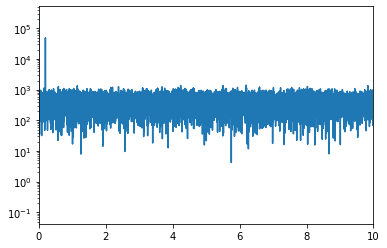

In [379]:
f = ft.fftfreq(x.size,0.01)[:x.size//2] # generating freq from time(x)
sp = np.abs(ft.fft(y))[:x.size//2] # Computing DFT of data(y)

# Plotting Freq vs SP to get PSD

plt.plot(f,sp)
plt.yscale('log')
plt.xlim(0,10)

<h4> Structure function (SF) </h4>

In [380]:
SF = np.array([])

tau_start = 0.1
tau_stop = 10
tau_step = 0.01

taus = np.arange(tau_start,tau_stop,tau_step)

for tau_i in taus:
    N_ints = int((x.max()-tau_i)/x_step)
    N_each = int(tau_i/x_step)
    summ = 0
    for J in range(N_ints):
        ct_a = y[J]
        ct_b = y[J+N_each]
        summ += (ct_a-ct_b)**2
    summ /= N_ints
    SF = np.append(SF,summ)
        
    

# for I in range(taus.size):
#     tau_i = taus[I]
    
#     for k in range(N_ints):
#         ct_a = y[j]; ct_b = y[j+tau_i]
#         summ += (ct_a - ct_b)**2
#     norm += yv .size
#     summ /= norm
#     SF = np.append(SF,summ)

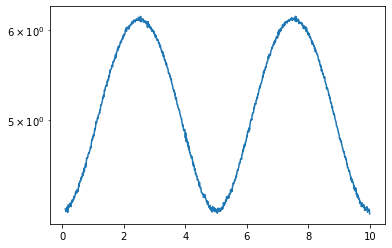

In [381]:
plt.plot(taus,SF)
plt.yscale('log')
# plt.xlim(0,1)

<h4> Jurkevich-Kidger (J-K) method </h4>

1. [Jurkevich (1971)](https://articles.adsabs.harvard.edu/pdf/1971Ap%26SS..13..154J)
2. [Kidger et al. (1992)](https://articles.adsabs.harvard.edu/pdf/1992A%26A...264...32K)

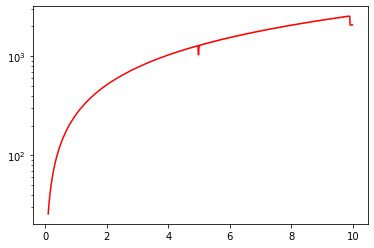

In [382]:
JK = np.array([])

tau_start = 0.1
tau_stop = 10
tau_step = 0.01

taus = np.arange(tau_start,tau_stop,tau_step)

for tau_i in taus:
    N_slices = int((x.max()-x.min())//tau_i)
    if y.size%N_slices == 0:
        ymod = y.reshape((N_slices,y.size//N_slices))
    else:
        ymod = (y[:-int(y.size%N_slices)]).reshape((N_slices,y.size//N_slices))
    JK = np.append(JK,(ymod.var(axis=0)).sum())

plt.plot(taus,JK,'r-')
plt.yscale('log')
# plt.xlim(4890,4910)

In [311]:
N_slices = int((x.max()-x.min())//tau_i)
Nslices



298

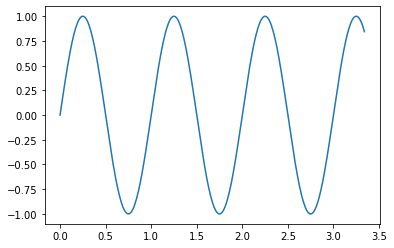

In [312]:
if y.size%Nslices == 0:
    ymod = y.reshape((Nslices,y.size//Nslices))
else:
    ymod = (y[:-int(y.size%Nslices)]).reshape((Nslices,y.size//Nslices))
plt.plot(x[:ymod.shape[1]],ymod[0])

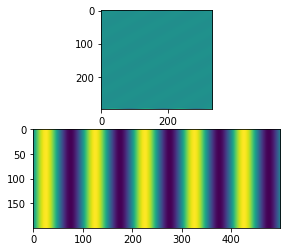

In [341]:
# yperiodic = ymod
plt.subplot(211)
plt.imshow(ymod)
plt.subplot(212)
plt.imshow(yperiodic)

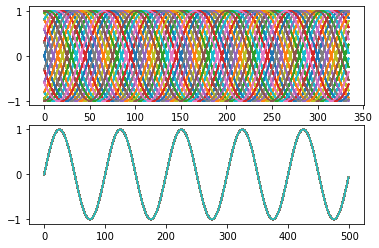

In [342]:
plt.subplot(211)
plt.plot(ymod.transpose())
plt.subplot(212)
plt.plot(yperiodic.transpose())


In [348]:
(yperiodic.var(axis=0)).sum(),(ymod.var(axis=0)).sum()

(1.174151029498589e-23, 167.5047502095394)

In [354]:
taus[4895]

4.995000000000004

In [353]:
taus.size


9900

In [282]:
y[:-int(y.size%Nslices)]

array([], dtype=float64)

In [285]:
y.size%Nslices


0

In [284]:
Nslices


200